In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SpectralSynthesis as ss
import pickle
from tqdm import tqdm

In [2]:
N_X = 22000
H_RANGE = [0,1]
S_RANGE = [0,3]
N_PIX = 128
E_DIMENSIONS = 2

PERIODIC = False
NOISE = True
EXP = True

In [3]:
H_list = np.random.uniform(H_RANGE[0], H_RANGE[1], N_X)
S_list = np.random.uniform(S_RANGE[0], S_RANGE[1], N_X)
noise_pct_list = np.random.random(N_X)*0.01

In [4]:
parameters = np.array([H_list, S_list, noise_pct_list]).T
parameters[0]

array([0.51058142, 1.51734045, 0.0068084 ])

In [11]:
def generate_data(parameter, N_PIX, PERIODIC, EXP):
    H,S,NOISE_FRACTION=parameter
    if PERIODIC:
        field = ss.fBm(E=E_DIMENSIONS,exp=EXP,H=H,sigma=S,N=N_PIX, centred = False)
    else:
        field = ss.fBm(E=E_DIMENSIONS,exp=EXP,H=H,sigma = S, N=N_PIX*4, centred=False)
        field = field[int((N_PIX*4-N_PIX)/2):int((N_PIX*4+N_PIX)/2),int((N_PIX*4-N_PIX)/2):int((N_PIX*4+N_PIX)/2)]

    m_1_field = np.mean(field)
    s_1_field = np.std(field)
    m_2_field = 0
    s_2_field = 1/4

    field *= s_2_field/s_1_field
    field += (m_2_field-m_1_field*s_2_field/s_1_field)

    if NOISE:
        noise = ss.fBm(E=E_DIMENSIONS,exp=False,H=-1,N=N_PIX)

        m_1_noise = np.mean(noise)
        s_1_noise = np.std(noise)
        m_2_noise = 0
        s_2_noise = s_2_field*NOISE_FRACTION

        noise *= s_2_noise/s_1_noise
        noise += (m_2_noise-m_1_noise*s_2_noise/s_1_noise)

        field += noise

    m_1_field = np.mean(field)
    s_1_field = np.std(field)
    m_2_field = 0
    s_2_field = 1/4

    field *= s_2_field/s_1_field
    field += (m_2_field-m_1_field*s_2_field/s_1_field)

    field[np.where(field>1.)] = 1.
    field[np.where(field<-1.)] = -1.

    field1 = (field-np.min(field))/(np.max(field)-np.min(field))
    field2 = np.rot90(field1)
    field3 = np.rot90(field2)
    field4 = np.rot90(field3)
    
    return [(field1,parameter),(field2,parameter),(field3,parameter),(field4,parameter)]

#DATA = []
#for parameter in tqdm(parameters):
#    field_list = generate_data(parameter,N_PIX,PERIODIC,EXP)
#    for datum in field_list:
#        DATA.append(datum)

DATA = [datum for parameter in tqdm(parameters) for datum in generate_data(parameter,N_PIX,PERIODIC,EXP)]

DATA

  0%|                                                                                        | 0/22000 [00:00<?, ?it/s]C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)
100%|████████████████████████████████████████████████████████████████████████████| 22000/22000 [47:26<00:00,  8.16it/s]


[(array([[0.30809157, 0.25443272, 0.20036776, ..., 0.47487187, 0.54918605,
          0.57560621],
         [0.44146417, 0.30081661, 0.22465847, ..., 0.37616407, 0.43343542,
          0.4974533 ],
         [0.44792367, 0.32339638, 0.23533482, ..., 0.40857744, 0.41824027,
          0.46243863],
         ...,
         [0.02198628, 0.01336611, 0.01386042, ..., 0.10490766, 0.09472505,
          0.09056387],
         [0.01704946, 0.01906877, 0.0126731 , ..., 0.06696562, 0.08511298,
          0.08769254],
         [0.01775687, 0.01867336, 0.01236858, ..., 0.0550391 , 0.07149953,
          0.06693864]]), array([0.51058142, 1.51734045, 0.0068084 ])),
 (array([[0.57560621, 0.4974533 , 0.46243863, ..., 0.09056387, 0.08769254,
          0.06693864],
         [0.54918605, 0.43343542, 0.41824027, ..., 0.09472505, 0.08511298,
          0.07149953],
         [0.47487187, 0.37616407, 0.40857744, ..., 0.10490766, 0.06696562,
          0.0550391 ],
         ...,
         [0.20036776, 0.22465847, 0.235334

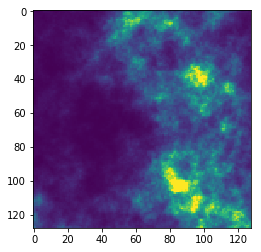

In [17]:
plt.imshow(DATA[1][0])

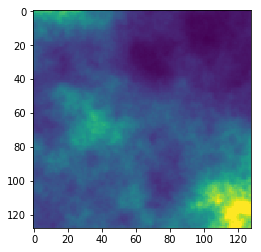

In [18]:
import random

random.shuffle(DATA)

plt.imshow(DATA[1][0])